In [1]:
from sklearn.linear_model import LinearRegression, ElasticNet
import pandas as pd
perch = pd.read_csv("Data/perch.csv")
perch.head()

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


In [3]:
perch["length^2"] = perch["length"] ** 2     # length의 제곱을 파생변수로 추가 
perch.head()

,length,weight,length^2
0,8.4,5.9,70.56
1,13.7,32.0,187.69
2,15.0,40.0,225.00
3,16.2,51.5,262.44
4,17.4,70.0,302.76


In [4]:
from sklearn.linear_model import LinearRegression

X = perch.drop("weight", axis = 1).values
Y = perch["weight"].values

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

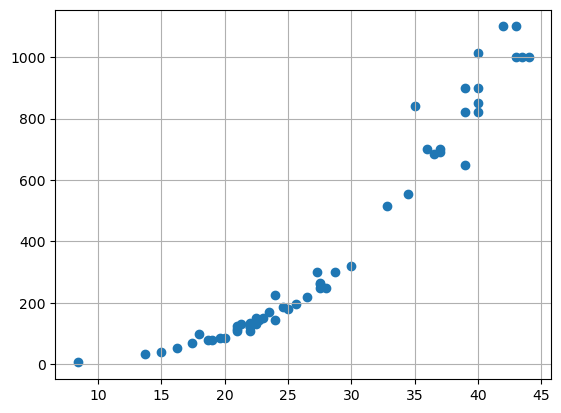

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], Y)
plt.grid()
plt.show()

In [8]:
model.coef_

array([-22.4189282 ,   1.02094922])

In [9]:
model.intercept_

131.64531969896075

In [10]:
import numpy as np
point = np.arange(10,46)
point

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45])

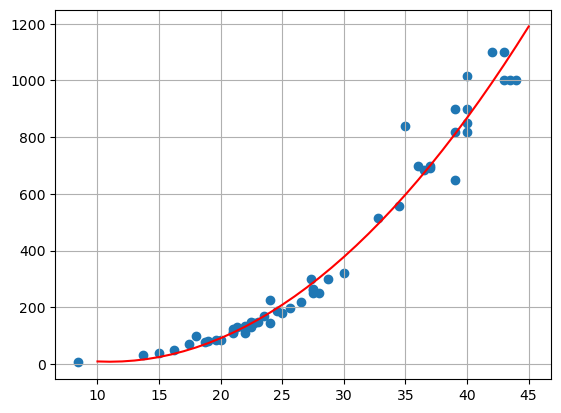

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], Y)
plt.plot(point, point*-22.4189282 + (point**2)*1.02094922 + 131.64531969896075, color = "red")
plt.grid()
plt.show()

# 특성공학

In [19]:
perch = pd.read_csv("Data/perch2.csv")

# 문제지 정답지
X = perch.drop("weight", axis = 1)
Y = perch["weight"]

# 데이터분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_x, test_x, train_y, test_y = train_test_split(X, Y)

# 표준화
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

# 모델학습
model = LinearRegression()
model.fit(train_scaled, train_y)

print(model.score(train_scaled, train_y))
print(model.score(test_scaled, test_y))

# 잘학습했다?

0.9345727190845482
0.9670276974663286


In [35]:
# 특성공학 => 특성을 강제적으로 늘린다
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias = False)
# degree=2라는건 2제곱까지 허용한다는 뜻
# include_bias가 True면 편향을 만들어준다 = 값이 1인걸 만들어준다? (모델의 절편을 학습할 수 있도록)

X2 = poly.fit_transform(X)
X2.shape
# 56행 3열이었던게 56행 9열로 바뀜 << 특성이 6개가 늘어남

(56, 34)

In [36]:
poly.get_feature_names_out()
# 어떤게 추가됐는지 확인 가능

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2',
       'length^3', 'length^2  height', 'length^2  width',
       'length  height^2', 'length  height  width', 'length  width^2',
       ' height^3', ' height^2  width', ' height  width^2', ' width^3',
       'length^4', 'length^3  height', 'length^3  width',
       'length^2  height^2', 'length^2  height  width',
       'length^2  width^2', 'length  height^3', 'length  height^2  width',
       'length  height  width^2', 'length  width^3', ' height^4',
       ' height^3  width', ' height^2  width^2', ' height  width^3',
       ' width^4'], dtype=object)

In [44]:
# 특성이 늘어난  X2로 다시 확인

# 데이터분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_x, test_x, train_y, test_y = train_test_split(X2, Y)

# 표준화
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

# 모델학습
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#model = LinearRegression()
model = Ridge(alpha = 1)
model.fit(train_scaled, train_y)

print(model.score(train_scaled, train_y))
print(model.score(test_scaled, test_y))

# degree를 4로늘렸을때에는 과적합남 (음수값이 나온다는건 다틀렸다는것)
# 다중공산성 문제는 포기하는 것.  성능을 높이는 것이 주목적.
# 과적합난상관에선 규제를줄수있다 -- ridge로해보면 성능 높게나타남

0.992977538048854
0.9680873084066751


# 로지스틱 회귀

### 선형회귀 => 회귀   
### 로지스틱 회귀 => 분류(회귀가 아니고 분류임)

왜 이름이 "로지스틱 회귀"일까?   

수학적으로 "회귀처럼 생긴 식을 로지스틱 함수에 넣어서 확률로 바꾼다"는 의미에서 이름이 붙은 것.   
즉, 내부적으로는 선형 조합 w·x + b을 만들고, 여기에 시그모이드 같은 함수를 씌워서 분류를 진행함  

수학적으로는 회귀 방식(logistic function + linear model)을 사용

In [45]:
# y = ax + b  ->  시그모이드(y)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

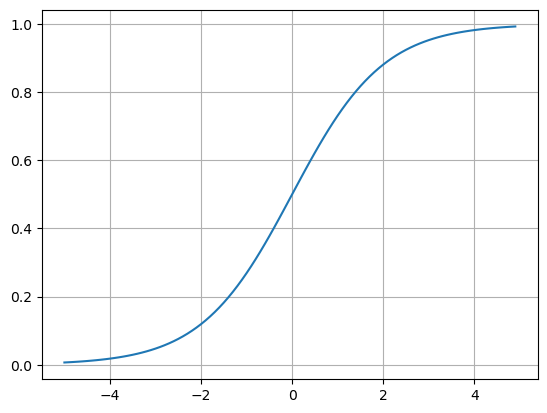

In [46]:
a = np.arange(-5, 5, 0.1)
b = sigmoid(a)

plt.plot(a, b)
plt.grid()
plt.show()

# 0 ~ 1 사이 값으로 나타남

# 로지스틱 회귀로 분류모델 만들기

# - 이진분류

In [47]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

fish = pd.read_csv("Data/fish.csv")
fish["target"] = encoder.fit_transform(fish["target"])       # fish의 타겟값을 encoder로 만들어준다
fish.head()

,length,weight,target
0,25.4,242.0,0
1,26.3,290.0,0
2,26.5,340.0,0
3,29.0,363.0,0
4,29.0,430.0,0


In [49]:
encoder.classes_

# target값에서 0은 bream, 1은 smelt을 나타낸다

array(['bream', 'smelt'], dtype=object)

In [61]:
from sklearn.linear_model import LogisticRegression         # 경사하강법 써서 학습함 

# 문제집,정답지
X = fish.drop("target", axis = 1)
Y = fish["target"]

# 데이터 분할
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

# 표준화  -  표준화해줘야 신뢰도있는 결과를 얻을 수 있음
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

#model = LogisticRegression()
# l2 : 릿지,  l1 : 라쏘
model = LogisticRegression(penalty="l2", C=1)
#model = LogisticRegression(penalty="l1", C=1, solver="saga") 

model.fit(train_scaled, train_y)     # 표준화된 훈련데이터로 학습

print(model.score(train_scaled, train_y))
print(model.score(test_scaled, test_y))

# 선형회귀를 시그모이드에 넣은것이라

1.0
1.0


In [56]:
model.coef_         # 기울기

array([[-1.82267656, -1.35536621]])

In [55]:
model.intercept_      # 절편

array([-1.78162379])

--------

# - 다중분류

In [65]:
# 로지스틱 회귀 구현
import seaborn as sns
iris = sns.load_dataset("iris")                   # 3종류의 꽃
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

iris["species"] = encoder.fit_transform(iris["species"])       # fish의 타겟값을 encoder로 만들어준다
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [69]:
encoder.classes_

# species값에서 0은 setosa, 1은 versicolor, 2는 virginica를 나타낸다

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [78]:
from sklearn.linear_model import LogisticRegression 

# 문제집,정답지
X = iris.drop("species", axis = 1)
Y = iris["species"]

# 데이터 분할
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

# 표준화  -  표준화해줘야 신뢰도있는 결과를 얻을 수 있음
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [87]:
model = LogisticRegression()
#model = LogisticRegression(penalty="l2", C=1)        # 릿지
#model = LogisticRegression(penalty="l1", C=1, solver="saga")         # 라쏘

model.fit(train_scaled, train_y)     # 표준화된 훈련데이터로 학습

# 모델평가
#print(model.score(train_scaled, train_y))
print(model.score(test_scaled, test_y))

0.9736842105263158


In [91]:
np.round(model.predict_proba(test_scaled), 2)
# 다 확률값으로 나온다
# 로지스틱회귀로 구해주면 k최근접과 달리 정확하게 구할 수 있다?

array([[0.99, 0.01, 0.  ],
       [0.  , 0.52, 0.48],
       [0.98, 0.02, 0.  ],
       [0.  , 0.05, 0.95],
       [0.  , 0.75, 0.25],
       [0.15, 0.83, 0.02],
       [0.97, 0.03, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.15, 0.85],
       [0.02, 0.78, 0.2 ],
       [0.01, 0.93, 0.06],
       [0.04, 0.91, 0.06],
       [0.98, 0.02, 0.  ],
       [0.  , 0.03, 0.97],
       [0.01, 0.71, 0.28],
       [0.  , 0.08, 0.92],
       [0.  , 0.04, 0.96],
       [0.  , 0.06, 0.94],
       [0.  , 0.06, 0.94],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.08, 0.71, 0.22],
       [0.05, 0.85, 0.1 ],
       [0.97, 0.03, 0.  ],
       [0.  , 0.39, 0.61],
       [0.04, 0.92, 0.03],
       [0.97, 0.03, 0.  ],
       [0.12, 0.84, 0.05],
       [0.04, 0.9 , 0.06],
       [0.99, 0.01, 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.03, 0.91, 0.06],
       [0.04, 0.78, 0.18],
       [0.  , 0.13, 0.87],
       [0.  , 0.66, 0.33],
       [0.03, 0.81, 0.16],
 

In [84]:
model.coef_         # 기울기
# 분류해야하는게 많아지면 (=다중분류가 되면) 기울기가 늘어나게 됨.
# 꽃의 특성이 4가지, 꽃의 종류가 3가지 => 4 * 3 = 12개의 기울기 만들어짐
# 꽃 종류마다 편향이 다 다름 (b1, b2, b3)

array([[-0.99317404,  1.09242579, -1.78947433, -1.66329084],
       [ 0.49742837, -0.27298284, -0.24306794, -0.74767175],
       [ 0.49574567, -0.81944295,  2.03254227,  2.41096259]])

In [85]:
model.intercept_      # 절편

array([-0.14798671,  1.72095808, -1.57297136])

In [95]:
a = np.array([0.3, 5, 2.7])        # y1,y2,y3 값이라 가정

exp_a = np.exp(a)
exp_a / sum(exp_a)     # 세 확률 다 더하면 1

array([0.00819871, 0.90142542, 0.09037587])

In [96]:
# y1,y2,y3가 클때
a = np.array([1000, 1010, 990]) 
c = max(a)    # 가장 큰 값을 c 에 저장
exp_a = np.exp(a-c)

## => 이진이면 시그모이드로, 다중이면 자연상수꼴로...(소프트맥스)